**Click on File and save a copy in Drive.**

*Here is our final task. We have to predict Indian GDP using past data.*

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown --id 1Nzu1PZHlcq95GOeA7wODWkDXsvMIyZix

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Nzu1PZHlcq95GOeA7wODWkDXsvMIyZix
To: /content/Indian_GDP_1960-2016.csv
100% 1.62k/1.62k [00:00<00:00, 2.26MB/s]


In [ ]:
#read csv from runtime using pd.read_csv
df = pd.read_csv('https://drive.google.com/uc?id=1Nzu1PZHlcq95GOeA7wODWkDXsvMIyZix')

In [ ]:
#delete unnamed: 0 column if you incounter
df.drop("Unnamed: 0",axis=1)


In [ ]:
#make column 'India GDP - Historical Data.1' as Y
Y = df['India GDP - Historical Data.1']
Y

In [ ]:
X = np.asarray(df['India GDP - Historical Data'].values.tolist())

In [ ]:
X = X.reshape(-1,1)

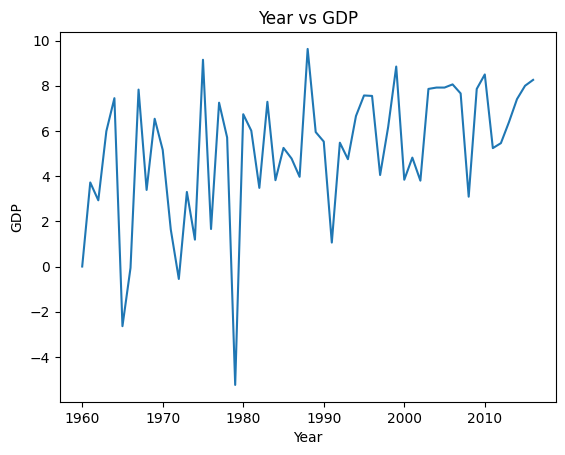

In [ ]:
#make plot of GDP vs Year
import matplotlib.pyplot as plt
plt.plot(X,df['India GDP - Historical Data.3'])
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Year vs GDP')
plt.show()

*To ensure that we don't exceed the limit while computing, we are subtracting 1959 from each year.*


In [ ]:
for i in range(np.shape(X)[0]):
  X[i][0]=X[i][0]-1959

Make sure your Shape X=(57, 1) Y=(57,).

In [ ]:
#print and check the shape
print(X.shape,Y.shape)

(57, 1) (57,)


To finish our final task, we will use Polynominal Regression.

**HINT:**

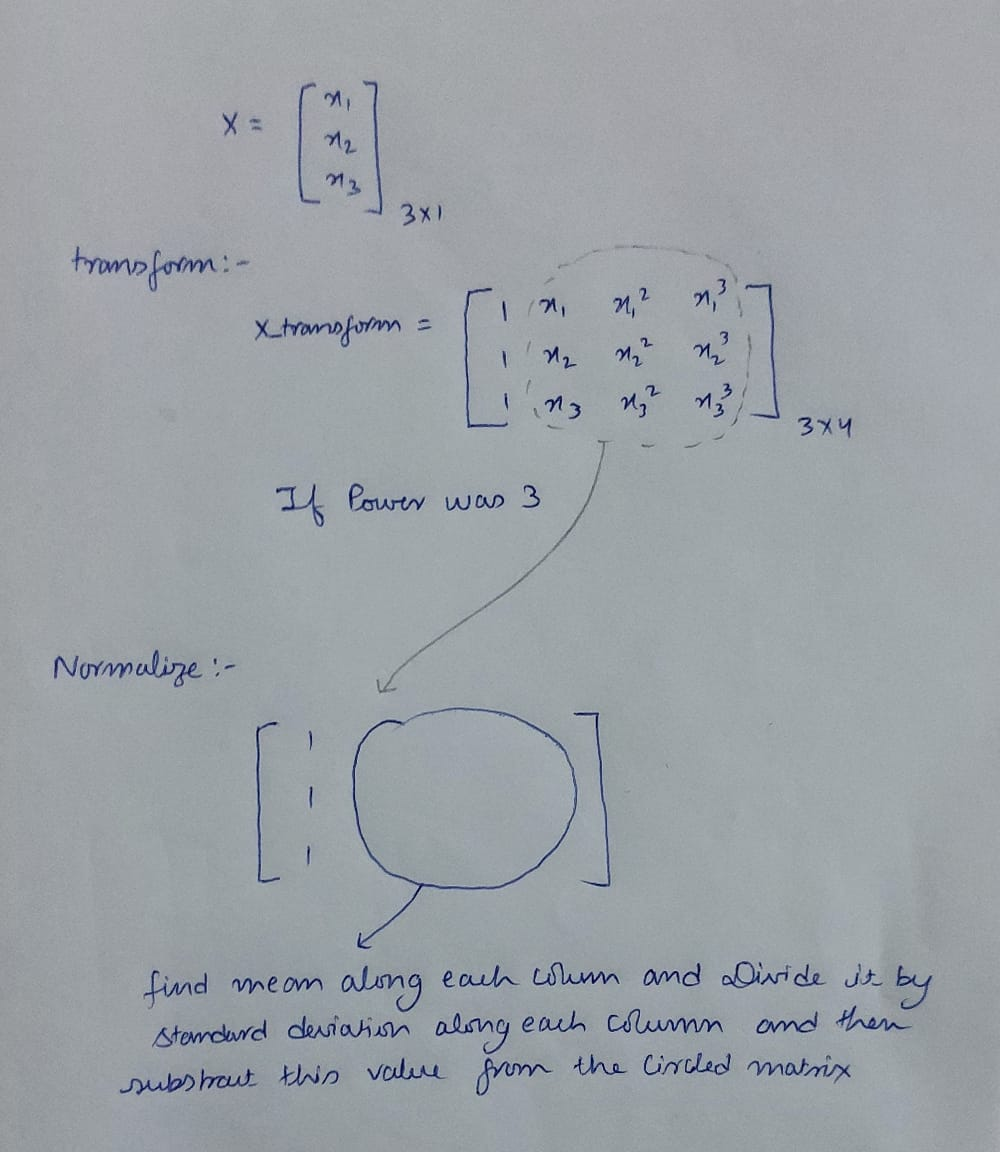

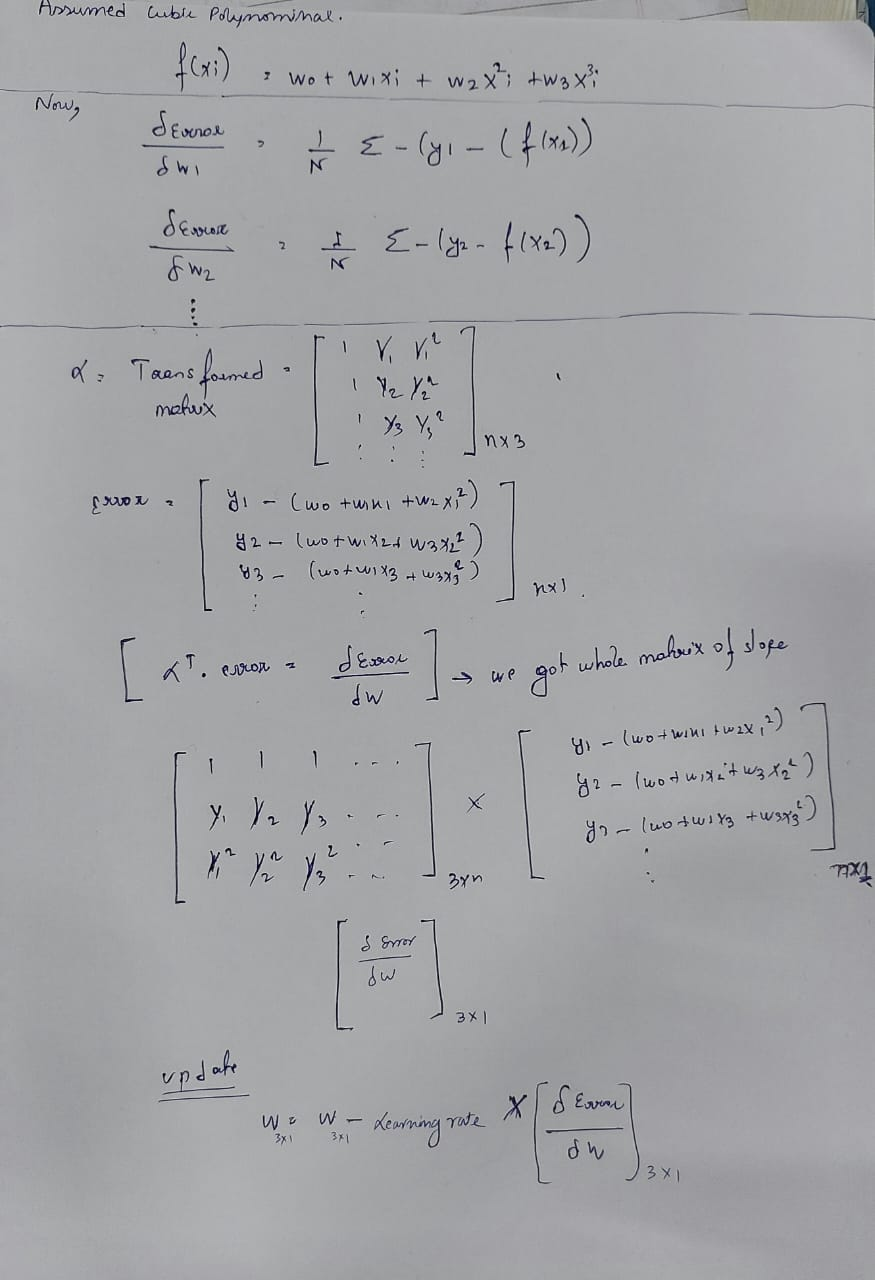

In [ ]:
#Polynomial Regression

class PolynomailRegression :
    def __init__( self, degree=5, learning_rate=0.01, iterations=500 ) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    # function to transform X
    def transform( self, X ) :
      X_transform = np.zeros((X.shape[0],self.degree+1))
      for i in range(X.shape[0]):
        for j in range(0,self.degree+1):
            X_transform[i,j] = X[i] ** j
      return X_transform

    # function to normalize X_transform
    def normalize( self, X ) :
      """
      mean = np.mean(X,axis=0)
      std = np.std(X,axis=0)
      for i in range(X.shape[0]):
        for j in range(0,self.degree+1):
          X[i,j] = np.divide((X[i,j]-mean[j]),std[j])
      """
      X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
      return X

    # model training

    def fit( self, X, Y ) :
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape
        # weight initialization
        self.W = np.zeros( self.degree + 1 )

        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n using self.transform
        X_transform = self.transform( self.X )
        # normalize X_transform using self.normalize
        X_normalize = self.normalize(X_transform)

        # gradient descent learning
        for i in range( self.iterations ) :
            h = self.predict( self.X )
            error = h - self.Y
            # update weights (To Update Weights take a dot product of normalized X and errorp)
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
        return self.W

    # predict

    def predict( self, X ) :
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform( X )
        X_normalize = self.normalize( X_transform )
        return np.dot( X_transform, self.W )

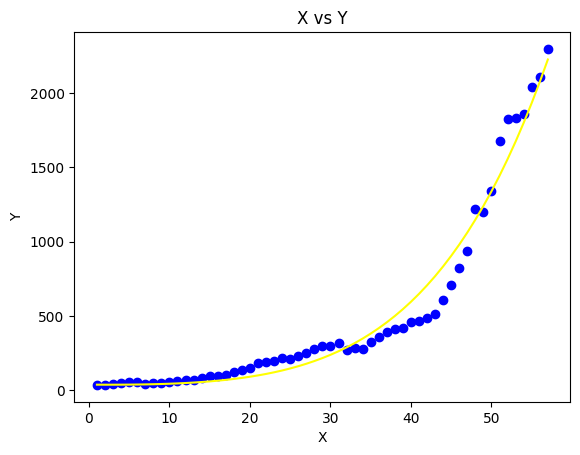

In [ ]:
# Driver code
model = PolynomailRegression()
# Train model using model.fit and save weights
model = PolynomailRegression( degree = 5, learning_rate = 0.01, iterations = 500 )
weights = model.fit( X, Y )
# Prediction on training set
Y_pred = model.predict( X )

# Visualization
#Scatter plot X,Y in blue colour
#line plot of X,Y_pred in yellow colour
plt.scatter(X,Y,color = "blue")
plt.plot(X,Y_pred,color = "yellow")
plt.title( 'X vs Y' )
plt.xlabel( 'X' )
plt.ylabel( 'Y' )
plt.show()


In [ ]:
weights

array([510.88803483,  -6.22193595,  64.84873347, 130.93642297,
       185.80817203, 228.88809584])

In [ ]:
!gdown --id 1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D
#https://drive.google.com/file/d/1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D/view?usp=sharing

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D
To: /content/fi_test.csv
100% 978/978 [00:00<00:00, 1.41MB/s]


In [ ]:
#read fi_test from runtime using pd.read_csv
test = pd.read_csv('https://drive.google.com/uc?id=1KEB87LRwss41W8_5B1jYRxhUOI7_e_1D')

In [ ]:
X_test=test['India GDP - Historical Data']
X_test=np.array(X_test)
X_test = X_test.reshape(-1,1)
Y_test=test['India GDP - Historical Data.1']
Y_test=np.array(Y_test)

In [ ]:
for i in range(np.shape(X_test)[0]):
  X_test[i][0]=X_test[i][0]-1959

In [ ]:
#Predict GDP with X_test
gdp = model.predict( X_test )

In [ ]:
for i in range(5):
  print(X_test[i]+1959)
  print( "Actual ", Y_test[i] )
  print("Predicted", gdp[i])
  print("\n")

[2021]
Actual  3173.4
Predicted 2738.249543734258


[2020]
Actual  2667.69
Predicted 2586.3428069906813


[2019]
Actual  2831.55
Predicted 2442.251768372378


[2018]
Actual  2702.93
Predicted 2305.665067730035


[2017]
Actual  2651.47
Predicted 2176.2799460423093




[Please click on this link to access subjective questions](https://docs.google.com/document/d/1kagZcm2hhipJEHFh3cIgXGg9hhG6Hol6Fs6wAIHSMsk/edit?usp=sharing)